In [ ]:
# --- Importing Libraries ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

from matplotlib.collections import PathCollection
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

NameError: name 'warnings' is not defined

In [ ]:
df = pd.read_csv("adm_data.csv",index_col=0)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.tail()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
396,324,110,3,3.5,3.5,9.04,1,0.82
397,325,107,3,3.0,3.5,9.11,1,0.84
398,330,116,4,5.0,4.5,9.45,1,0.91
399,312,103,3,3.5,4.0,8.78,0,0.67
400,333,117,4,5.0,4.0,9.66,1,0.95


In [ ]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 28.1 KB


In [ ]:
df.select_dtypes(exclude='object').describe().T.style.background_gradient(cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
GRE Score,400.000000,316.807500,11.473646,290.000000,308.000000,317.000000,325.000000,340.000000
TOEFL Score,400.000000,107.410000,6.069514,92.000000,103.000000,107.000000,112.000000,120.000000
University Rating,400.000000,3.087500,1.143728,1.000000,2.000000,3.000000,4.000000,5.000000
SOP,400.000000,3.400000,1.006869,1.000000,2.500000,3.500000,4.000000,5.000000
LOR,400.000000,3.452500,0.898478,1.000000,3.000000,3.500000,4.000000,5.000000
CGPA,400.000000,8.598925,0.596317,6.800000,8.170000,8.610000,9.062500,9.920000
Research,400.000000,0.547500,0.498362,0.000000,0.000000,1.000000,1.000000,1.000000
Chance of Admit,400.000000,0.724350,0.142609,0.340000,0.640000,0.730000,0.830000,0.970000


In [ ]:
data = []
rate = df["Chance of Admit "].values
for x in rate:
  if (x >= 0.1 and x < 0.60):    
    data.append("low")
  elif (x >= 0.60 and x < 0.90):
    data.append("medium")
  elif (x >= 0.90 and x < 1.00):
    data.append("high")

In [ ]:
df['category'] = data
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,category
Serial No.,,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92,high
2,324,107,4,4.0,4.5,8.87,1,0.76,medium
3,316,104,3,3.0,3.5,8.00,1,0.72,medium
4,322,110,3,3.5,2.5,8.67,1,0.80,medium
5,314,103,2,2.0,3.0,8.21,0,0.65,medium
...,...,...,...,...,...,...,...,...,...
396,324,110,3,3.5,3.5,9.04,1,0.82,medium
397,325,107,3,3.0,3.5,9.11,1,0.84,medium
398,330,116,4,5.0,4.5,9.45,1,0.91,high


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
corr = df.corr()

<AxesSubplot:>

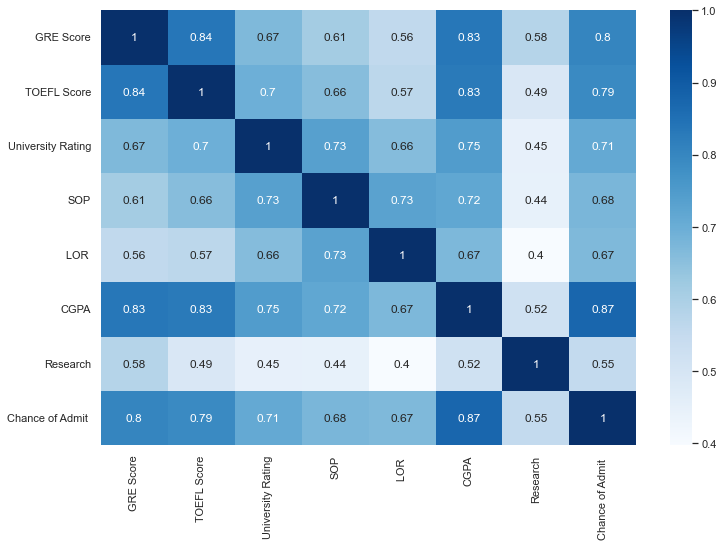

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(corr, annot = True, cmap = 'Blues')

In [ ]:
# Map to upper,lower and diagonal
plot = sns.PairGrid(df)
plot.map_diag(plt.hist)
plot.map_upper(plt.scatter)
plot.map_lower(sns.kdeplot)

In [ ]:
# --- Create List of Color Palletes ---
red_grad = ['#FF0000', '#BF0000', '#800000', '#400000', '#000000']
pink_grad = ['#8A0030', '#BA1141', '#FF5C8A', '#FF99B9', '#FFDEEB']
purple_grad = ['#4C0028', '#7F0043', '#8E004C', '#A80059', '#C10067']
color_mix = ['#F38BB2', '#FFB9CF', '#FFD7D7', '#F17881', '#E7525B']
black_grad = ['#100C07', '#3E3B39', '#6D6A6A', '#9B9A9C', '#CAC9CD']
blue_grad = ['#66D7EB', '#51ACC5', '#3E849E', '#2C5F78', '#0E1E2B']
# --- Setting Colors, Labels, Order ---
colors=blue_grad[1:5]
labels=['High', 'Medium', 'Low']
order=df['category'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(18, 10))
plt.suptitle('Category Distribution', fontweight='heavy', 
             fontsize='16', fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,
          fontfamily='sans-serif', color=black_grad[0])
plt.pie(df['category'].value_counts(), labels=labels, colors=colors, pctdistance=0.7,
        autopct='%.2f%%', wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]),
        textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[0])
ax = sns.countplot(x='category', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
             bbox=dict(facecolor='none', edgecolor=black_grad[0], 
                       linewidth=0.25, boxstyle='round'))

plt.xlabel('Category', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.xticks([0, 1, 2, 3], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 25)
print('\033[1m'+'.: Category Total :.'+'\033[0m')
print('*' * 25)
df.category.value_counts(dropna=False)